In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [71]:
import sys
sys.path.append('src')

In [72]:
from data_processing import process_proteomics_data, get_processing_summary
from visualization import create_volcano_plot, create_plots

In [73]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [74]:
input_file = "Input files/JP_2_253_EST1140_PD.csv"

In [75]:
processed_data = process_proteomics_data(input_file)

INFO:data_processing:Loading data from Input files/JP_2_253_EST1140_PD.csv
INFO:data_processing:Loaded data with shape: (22914, 17)
INFO:data_processing:Removed 0 duplicate accession rows
INFO:data_processing:Filtered out 6093 rows containing 'reverse' or 'contaminant'
INFO:data_processing:Removed 6093 contaminant/reverse rows
INFO:data_processing:Filtered out 102 rows with 0 or 'infinity' values
INFO:data_processing:Removed 102 invalid ratio rows
/Users/amanmodi/TMT-proteomics-IP2/venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
INFO:data_processing:Log2 ratio statistics - Mean: inf, Std: nan, Range: [-4.215, inf]
INFO:data_processing:Added log2_norm_ratio column
INFO:data_processing:Processed data saved to Input files/JP_2_253_EST1140_PD_output_df.csv
INFO:data_processing:Data processing complete. Final shape: (16719, 18)


In [76]:
original_data = pd.read_csv(input_file)
summary = get_processing_summary(original_data, processed_data)

In [77]:
display(processed_data.head())

,ACCESSION,GENE,TOTAL_INTENSITY_1,NORM_INTENSITY_1,TOTAL_INTENSITY_2,NORM_INTENSITY_2,PVALUE_1,QVALUE_1,NORM_PVALUE_1,NORM_QVALUE_1,AVERAGE_INTENSITY_1,AVERAGE_INTENSITY_2,NORM_AVERAGE_INTENSITY_1,NORM_AVERAGE_INTENSITY_2,RATIO_2_1,NORM_RATIO_2_1,log2_norm_ratio,DESCRIPTION
0,A0A024QZ33,CCDC55,"56303,54949,73019,","76975.0,58314.0,65443.0,","22134,18234,16060,","24019.0,20363.0,11521.0,",0.012305,0.530125,0.002947,0.073489,6.142367e+04,1.880933e+04,6.691067e+04,1.863433e+04,0.306223,0.278496,-1.844273,"Coiled-coil domain containing 55, isoform CRA_..."
1,A0A024QZX5,SERPINB6,"5881936,8287314,10980129,","8041693.0,8794971.0,9841120.0,","8184665,8862287,12814948,","8882311.0,9897625.0,9194854.0,",0.488681,0.822132,0.521602,0.713168,8.383126e+06,9.953967e+06,8.892595e+06,9.324930e+06,1.187381,1.048617,0.068488,Serpin B6 OS=Homo sapiens GN=SERPINB6 PE=1 SV=1
2,A0A024R161,DNAJC25-GNG10,"126331,184794,212750,","172717.0,196114.0,190680.0,","140572,151346,185467,","152554.0,169026.0,133073.0,",0.627725,0.861524,0.057396,0.222610,1.746250e+05,1.591283e+05,1.865037e+05,1.515510e+05,0.911257,0.812590,-0.299401,Guanine nucleotide-binding protein subunit gam...
3,A0A024R1V6,PCGF2,"1998449,2152925,2348151,","2732250.0,2284808.0,2104567.0,","1691895,1560351,1888126,","1836108.0,1742638.0,1354749.0,",0.031229,0.639691,0.040059,0.182998,2.166508e+06,1.713457e+06,2.373875e+06,1.644498e+06,0.790884,0.692748,-0.529596,Polycomb group RING finger protein 2 OS=Homo s...
4,A0A024R4E5,HDLBP,"19116591,25848666,31169032,","2.6135915E7,2.7432097E7,2.7935747E7,","31178868,31489258,52803964,","3.3836507E7,3.5168009E7,3.7887407E7,",0.201267,0.814797,0.009424,0.102629,2.537810e+07,3.849070e+07,2.716792e+07,3.563064e+07,1.516690,1.311497,0.391214,High density lipoprotein binding protein (Vigi...


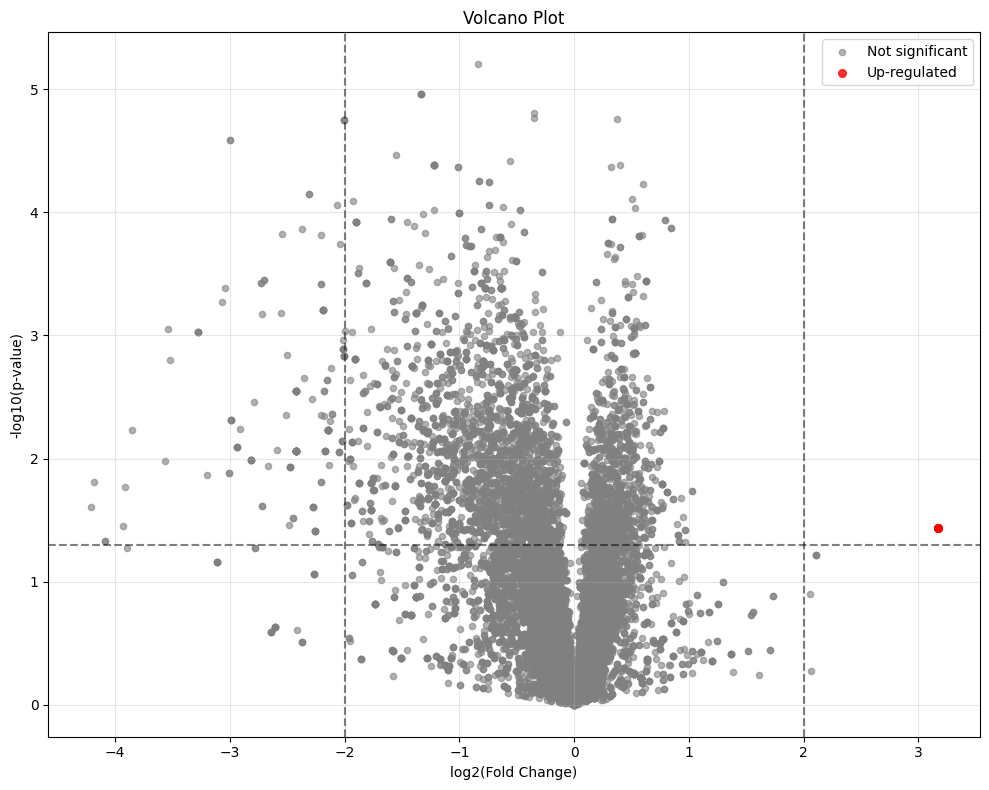

In [86]:
fig = create_volcano_plot(
    processed_data,
    pvalue_threshold=0.05,
    fold_change_threshold=4
)

plt.show()

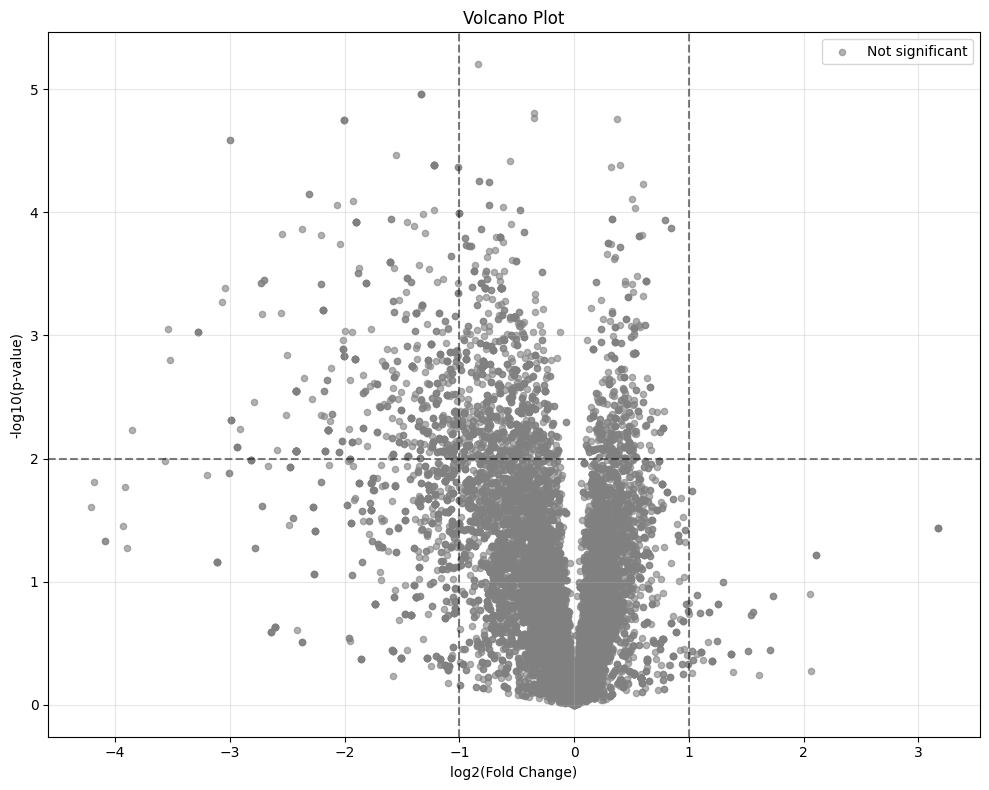

In [80]:
fig_custom = create_volcano_plot(
    processed_data,
    pvalue_threshold=0.01,  # More stringent p-value threshold
    fold_change_threshold=2.0  # Higher fold change threshold
)

plt.show()

In [81]:
output_file = "processed_proteomics_data.csv"
processed_data.to_csv(output_file, index=False)
print(f"Processed data saved to: {output_file}")

Processed data saved to: processed_proteomics_data.csv


In [82]:
fig.savefig("volcano_plot.png", dpi=300, bbox_inches='tight')

In [88]:
print(f"Total unique proteins: {processed_data['GENE'].nunique()}")

Total unique proteins: 8069
